## Classification Method

In [14]:
import pandas as pd
from pandasql import sqldf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Creating the dataframe

data = {"X":[1.0,1.7,2.1,2.7,3.0,2.8,3.3],
        "Y":[0,0,0,1,1,1,1]}

In [6]:
df = pd.DataFrame(data)
df

,X,Y
0,1.0,0
1,1.7,0
2,2.1,0
3,2.7,1
4,3.0,1
5,2.8,1
6,3.3,1


In [7]:
# Creating a linear regression

X = sm.add_constant(df["X"])
model = sm.OLS(df["Y"],X).fit()
model


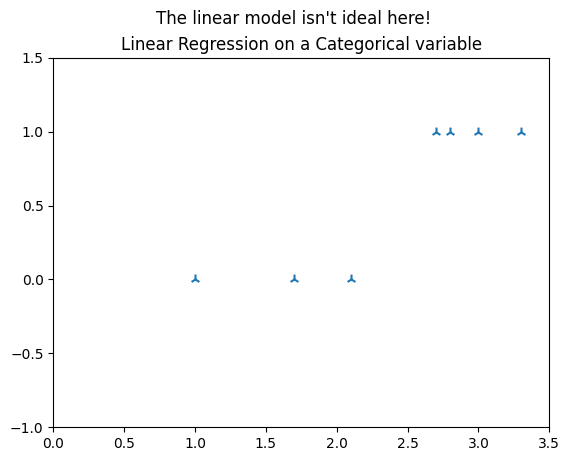

In [10]:
plt.scatter(df["X"],df["Y"], marker = "2", s = 50)
plt.title("Linear Regression on a Categorical variable")
plt.suptitle("The linear model isn't ideal here!")
plt.xlim(0,3.5)
plt.ylim(-1,1.5)
plt.show()

In [23]:
# Getting a dataset
fg = pd.read_csv("/Users/schoolsoftware/Documents/wd/python_basics/dataset/fg.csv")


In [25]:
fg.describe()

,yards,success,week
count,948.000000,948.000000,948.000000
mean,36.504219,0.797468,8.989451
std,9.761300,0.402098,4.899830
min,18.000000,0.000000,1.000000
25%,28.000000,1.000000,5.000000
50%,37.000000,1.000000,9.000000
75%,45.000000,1.000000,13.000000
max,62.000000,1.000000,17.000000


In [26]:
# converting success variable into categorical
fg["success"] = fg["success"].astype("category")

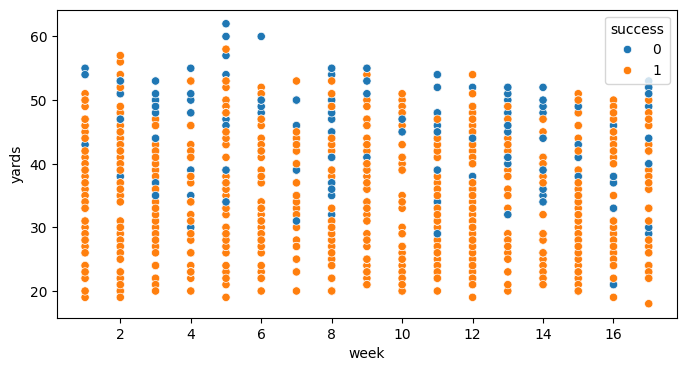

In [29]:
# simply showing scatterplot based on the fg dataset

numeric_success = pd.to_numeric(fg["success"],
                                errors = "coerce")
sampled_values = numeric_success.sample(n = 20, 
                                       replace = True)

import seaborn as sns
plt.figure(figsize = (8,4))
sns.scatterplot(x = "week",
                y = "yards",
                hue = "success",
                data = fg)
plt.show()

In [30]:
# Success counts
success_counts = fg["success"].value_counts()
print(success_counts)

success
1    756
0    192
Name: count, dtype: int64


In [32]:
# Success proportion
prop_sec_factor = success_counts.iloc[0] / success_counts.sum()
prop_sec_factor

0.7974683544303798

In [33]:
success_counts.iloc[0]

756

In [34]:
# sklearn knn
from sklearn.neighbors import KNeighborsClassifier

In [44]:
train = fg[['yards','week']]
cl = fg['success']

test = pd.DataFrame({'yards':[55],
                     'week':[8]})

knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(train,cl)

KNeighborsClassifier(n_neighbors=3)

In [45]:
# Predction
prediction = knn_classifier.predict(test)
print("Predicted Class:", prediction)


Predicted Class: [0]


In [43]:
# changing the k
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(train,cl)
prediction = knn_classifier.predict(test)
print("Predicted Class:", prediction)


Predicted Class: [0]


In [48]:
import numpy as np

np.random.seed(123)
num_rows = len(fg)
num_rows

948

In [52]:
# random indices for sampling 50% of rows

Z = np.random.choice(fg.index,
                     size = int(0.5 * len(fg)),
                     replace = False)

# Using the sampled indices to get the corresponding subset

sampled_fg = fg.loc[Z]


,yards,success,week
910,50,1,17
720,48,0,13
151,50,0,3
55,20,1,2
691,23,1,13
...,...,...,...
14,36,1,1
544,47,0,11
491,47,1,9
233,48,1,5
